# Strategies to deal with unknown class

## Common Parameters

In [27]:
sys.path.append("..") # Adds higher directory to python modules path.
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import *
from helpers import *
from visuals import *
from data.data import *
from collections import Counter

import pandas as pd
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score
from visuals import plot_confusion_matrix
from tensorflow.keras import utils
from keras_numpy_backend import categorical_crossentropy

%load_ext autoreload
%autoreload 2
%matplotlib inline

data_folder = '../data/isic2019/sampled_full'

model_folder = 'models'
history_folder = 'history'

model_name = 'DenseNet201'
postfix = 'best_balanced_acc'

models_info = get_models_info(history_folder, model_name)
workers = os.cpu_count()

# How to handle SVG fonts
plt.rcParams['svg.fonttype'] = 'none'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## DenseNet201 analysis

# Compute test metrics with unknown class

Test data has 5088 samples.
'MEL':	904	(17.77%)
'NV':	2575	(50.61%)
'BCC':	665	(13.07%)
'AK':	173	(3.40%)
'BKL':	525	(10.32%)
'DF':	48	(0.94%)
'VASC':	51	(1.00%)
'SCC':	126	(2.48%)
'UNK':	21	(0.41%)


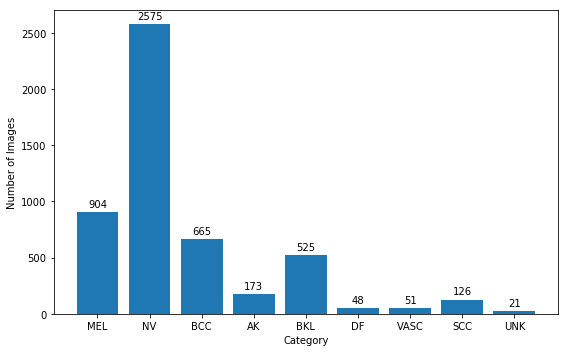

In [24]:
training_image_folder = os.path.join(data_folder, 'ISIC_2019_Test_Input')
ground_truth_file = os.path.join(data_folder, 'ISIC_2019_Test_GroundTruth.csv')

df_test_ground_truth, known_category_names, unknown_category_name = load_isic_training_data(
    training_image_folder, 
    ground_truth_file,
    test=True
)
known_category_num = len(known_category_names)
unknown_category_num = 1
all_category_names = known_category_names + [unknown_category_name]
all_category_num = known_category_num + unknown_category_num

count_per_category = Counter(df_test_ground_truth['category'])
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))
for i, c in enumerate(all_category_names):
    print("'%s':\t%d\t(%.2f%%)" % (c, count_per_category[i], count_per_category[i]*100/total_sample_count))

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('white')
ax.set(xlabel='Category', ylabel='Number of Images')
rects = plt.bar(all_category_names, [count_per_category[i] for i in range(all_category_num)])
autolabel(ax, rects)
fig.tight_layout()

## Threshold: 0.3

DenseNet201:
	Train + validation sampled: 20264
	Feature extract epochs: 6
	Feature extract learning rate: 0.001000
	Fine tuning learning rate: 0.000010
	Dropout rate: 0.300000
	Lambda(l2): None
	Batch size: 16
accuracy:  0.7914291330843326
balanced_accuracy_score:  0.588651845442536
macro recall_score:  0.588651845442536


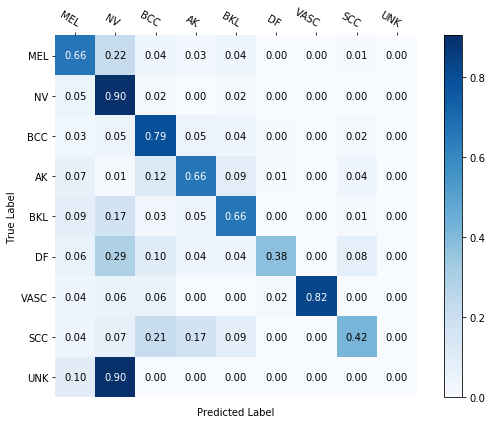

In [25]:
pred_test_folder = os.path.join("..", 'test_predict_results_unknown_0.3', model_name) 

for model_info in models_info:
    # Load predicted results
    file_path = os.path.join(
        pred_test_folder, 
        model_info["hyperparameters_dir"],
        "{}.csv".format(postfix)
    )
    if not os.path.exists(file_path):
        continue

    print(f"{model_name}:") 
    print(f"\tTrain + validation sampled: {model_info['hyperparameters']['samples']}")
    print(f"\tFeature extract epochs: {model_info['hyperparameters']['feepochs']}")
    print(f"\tFeature extract learning rate: {model_info['hyperparameters']['felr']}")
    print(f"\tFine tuning learning rate: {model_info['hyperparameters']['ftlr']}")
    print(f"\tDropout rate: {model_info['hyperparameters']['dropout']}")
    print(f"\tLambda(l2): {model_info['hyperparameters']['lambda']}")
    print(f"\tBatch size: {model_info['hyperparameters']['batch']}")
    
    df_pred = pd.read_csv(file_path)
    df = pd.merge(df_pred, df_test_ground_truth, on='image')
    y_true = df['category']
    y_pred = df['pred_category']
    df.to_csv("test.csv")

    # Compute Balanced Accuracy
    print('accuracy: ', accuracy_score(y_true, y_pred))
    print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
    print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
    # Confusion Matrix
    plot_confusion_matrix(
        y_true, 
        y_pred, 
        all_category_names, 
        normalize=True,
        figsize=(8, 6)
    )
    plt.show()

## Threshold: 0.5

DenseNet201:
	Train + validation sampled: 20264
	Feature extract epochs: 6
	Feature extract learning rate: 0.001000
	Fine tuning learning rate: 0.000010
	Dropout rate: 0.300000
	Lambda(l2): None
	Batch size: 16
accuracy:  0.7707882838608217
balanced_accuracy_score:  0.5506993848757751
macro recall_score:  0.5506993848757751


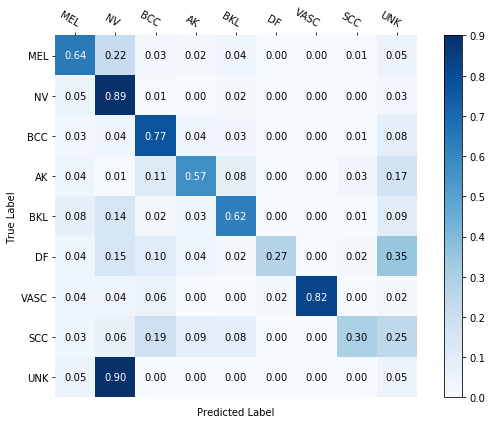

In [26]:
pred_test_folder = os.path.join("..", 'test_predict_results_unknown_0.5', model_name) 

for model_info in models_info:
    # Load predicted results
    file_path = os.path.join(
        pred_test_folder, 
        model_info["hyperparameters_dir"],
        "{}.csv".format(postfix)
    )
    if not os.path.exists(file_path):
        continue

    print(f"{model_name}:") 
    print(f"\tTrain + validation sampled: {model_info['hyperparameters']['samples']}")
    print(f"\tFeature extract epochs: {model_info['hyperparameters']['feepochs']}")
    print(f"\tFeature extract learning rate: {model_info['hyperparameters']['felr']}")
    print(f"\tFine tuning learning rate: {model_info['hyperparameters']['ftlr']}")
    print(f"\tDropout rate: {model_info['hyperparameters']['dropout']}")
    print(f"\tLambda(l2): {model_info['hyperparameters']['lambda']}")
    print(f"\tBatch size: {model_info['hyperparameters']['batch']}")
    
    df_pred = pd.read_csv(file_path)
    df = pd.merge(df_pred, df_test_ground_truth, on='image')
    y_true = df['category']
    y_pred = df['pred_category']
    df.to_csv("test.csv")

    # Compute Balanced Accuracy
    print('accuracy: ', accuracy_score(y_true, y_pred))
    print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
    print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
    # Confusion Matrix
    plot_confusion_matrix(
        y_true, 
        y_pred, 
        all_category_names, 
        normalize=True,
        figsize=(8, 6)
    )
    plt.show()